[Session #4 Homework](https://colab.research.google.com/github/Jaguar838/ml-zoomcamp/blob/master/HW/04-evalucion/hw-04.ipynb)

## Dataset

Для цього домашнього завдання ми будемо використовувати набір даних Bank Marketing. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

---
Кожна ознака в цьому банківському датафреймі має конкретне значення, яке стосується характеристик клієнтів і їх взаємодії з банком. Ось пояснення кожної ознаки:

1. **age** — вік клієнта.
2. **job** — робота клієнта (наприклад, "management" — управлінець, "technician" — технік, "blue-collar" — робітник і т.д.).
3. **marital** — сімейний статус клієнта (наприклад, "married" — одружений, "single" — неодружений, "divorced" — розлучений).
4. **education** — рівень освіти клієнта (наприклад, "primary", "secondary", "tertiary", або "unknown", якщо інформація відсутня).
5. **default** — чи є у клієнта кредит за умовчанням ("yes" або "no").
6. **balance** — середній баланс на рахунку клієнта в євро.
7. **housing** — чи має клієнт іпотечний кредит ("yes" або "no").
8. **loan** — чи має клієнт споживчий кредит ("yes" або "no").
9. **contact** — тип контактного зв'язку, який використовувався для зв'язку з клієнтом (наприклад, "cellular" — мобільний, "telephone" — стаціонарний або "unknown" — невідомо).
10. **day** — день місяця, коли відбувався останній контакт з клієнтом.
11. **month** — місяць останнього контакту з клієнтом (наприклад, "may" — травень, "jun" — червень і т.д.).
12. **duration** — тривалість останнього контакту з клієнтом у секундах.
13. **campaign** — кількість контактів, зроблених в ході поточної кампанії для цього клієнта.
14. **pdays** — кількість днів, що минули з моменту останнього контакту з клієнтом у попередній кампанії. Значення -1 означає, що клієнт раніше не контактував.
15. **previous** — кількість контактів з клієнтом у попередніх кампаніях.
16. **poutcome** — результат попередньої маркетингової кампанії (наприклад, "success" — успіх, "failure" — невдача, "unknown" — невідомо).
17. **y** — цільова змінна, яка показує, чи підписався клієнт на терміновий депозит ("yes" або "no").

Ці ознаки використовуються для аналізу та моделювання маркетингових рішень банку, зокрема для передбачення, чи клієнт підпишеться на депозит.

In [14]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
data = pd.read_csv("https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/bank-full.csv", sep=';')


In [17]:
features = [
    'age', 'job', 'marital', 'education', 'balance',
    'housing', 'contact', 'day', 'month', 'duration',
    'campaign', 'pdays', 'previous', 'poutcome', 'y'
]
data = data[features]
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


## Make `y` binary

* Тепер закодуємо змінну `y`.
* Замініть значення `yes`/`no` на `1`/`0`

In [18]:
data.y = (data.y == 'yes').astype(int)
data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [20]:
data.nunique()

,0
age,77
job,12
marital,3
education,4
balance,7168
housing,2
contact,3
day,31
month,12
duration,1573


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `1`
* Make sure that the target value (`y`) is not in your dataframe

In [21]:
SEED = 1
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)

In [22]:

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns


print(f"len data :{len(data)}, train :{len(df_train)} ({len(df_train)/len(data):.2f})")
print(f"len data :{len(data)}, val   :{len(df_val)} ({len(df_val)/len(data):.2f})")
print(f"len data :{len(data)}, test  :{len(df_test)} ({len(df_test)/len(data):.2f})")

len data :45211, train :27126 (0.60)
len data :45211, val   :9042 (0.20)
len data :45211, test  :9043 (0.20)


## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [23]:
numerical_features = ['balance', 'day', 'duration', 'previous']
scores = pd.DataFrame(columns=['numerical_feature', 'AUC'])
# Обчислюємо ROC AUC для кожної числової змінної
for feature in numerical_features:
    auc = roc_auc_score(y_train, df_train[feature])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[feature])
    scores.loc[len(scores)] = [feature, auc]

scores

,numerical_feature,AUC
0,balance,0.588831
1,day,0.525958
2,duration,0.814700
3,previous,0.598565


In [24]:
max_AUC = scores.AUC.max()
feature = scores[scores.AUC == max_AUC]['numerical_feature'].iloc[0]

print(f"Q1: The numerical variable with the highest AUC is: {feature}={scores.max()['AUC']:0.3f}")

Q1: The numerical variable with the highest AUC is: duration=0.815


## Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [27]:
#@ DEFINING TRAIN AND PREDICT FUNCTION:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [28]:
dv, model = train(df_train, y_train, C=1.0)
y_val_pred = predict(df_val, dv, model)

In [29]:
#calculate AUC of model
auc = roc_auc_score(y_val, y_val_pred)

#print AUC score
print('Q2: AUC score %.3f' % auc)

Q2: AUC score 0.900


## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [30]:
from sklearn.metrics import precision_score, recall_score

scores = []
# Порогові значення від 0 до 1 з кроком 0.01
# thresholds = np.arange(0.0, 1.01, 0.01)
thresholds = np.linspace(0, 1, 101)

In [32]:
# Обчислюємо precision та recall для кожного порогу
for t in thresholds:
  recall = recall_score(y_val, y_val_pred >= t)
  precision = precision_score(y_val, y_val_pred >= t)
  scores.append((t, precision, recall))

columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)

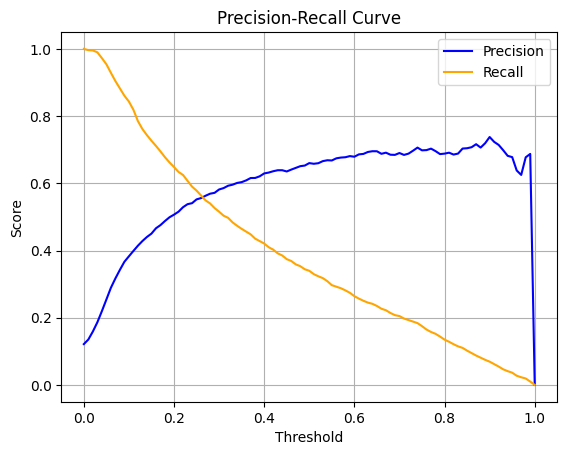

Q3: Precision and recall intersect at threshold: 0.260


In [33]:
thresholds = df_scores['threshold'].values
precisions = df_scores['precision'].values
recalls = df_scores['recall'].values

# Побудова графіку
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Знайти точку, де precision і recall перетинаються
intersect_threshold_idx = np.where(np.abs(np.array(precisions) - np.array(recalls)) < 0.01)[0]
intersect_threshold = thresholds[intersect_threshold_idx][0]

# Позначення точки перетину
intersect_precision = precisions[intersect_threshold_idx][0]
plt.plot(intersect_threshold, intersect_precision, 'ro')  # 'ro
print(f"Q3: Precision and recall intersect at threshold: {intersect_threshold:.3f}")

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

In [34]:
  df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)

In [35]:
df_scores.iloc[20:26]

,threshold,precision,recall,f1
20,0.20,0.506762,0.648452,0.568917
21,0.21,0.515556,0.633880,0.568627
22,0.22,0.528913,0.624772,0.572860
23,0.23,0.537903,0.607468,0.570573
24,0.24,0.540902,0.590164,0.564460
25,0.25,0.552174,0.578324,0.564947


In [37]:
# Знаходимо максимальне значення f1 та відповідний поріг threshold
max_f1 = df_scores.f1.max()
best_threshold = df_scores[df_scores['f1'] == max_f1]['threshold'].iloc[0]

print(f"Q4: index {df_scores.f1.argmax()} max f1-score: {max_f1:.3f} with threshold: {best_threshold}")

Q4: index 22 max f1-score: 0.573 with threshold: 0.22


In [ ]:
f1 = df_scores.f1.values
# Побудова графіка зі зміненими осями
plt.figure(figsize=(8, 6))
plt.plot(f1, thresholds, marker='o', color='b', linestyle='-')
plt.scatter(best_threshold, max_f1, color='red', label=f'Max F1 = {max_f1:.5f} at Threshold = {best_threshold}')
plt.xlabel("F1 Score")
plt.ylabel("Threshold")
plt.title("Залежність Threshold від F1")
plt.grid(True)
plt.show()


## Question 5: 5-Fold CV

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```
* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26


In [38]:
def kfold_lr(df, c=1.0, n=5, r_s=SEED):
  # Prepare cross-validation
  kf = KFold(n_splits=n, shuffle=True, random_state=r_s)
  auc_scores = []
  df = df.reset_index(drop=True)

  # Cross-validation
  for train_idx, val_idx in kf.split(df):
      df_train, df_val = df.iloc[train_idx], df.iloc[val_idx]

      df_train = df_train.reset_index(drop=True)
      df_val = df_val.reset_index(drop=True)

      X_train, y_train = df_train.drop(columns=['y']), df_train['y']
      X_val, y_val = df_val.drop(columns=['y']), df_val['y']

      dv, model = train(X_train, y_train, C=c)
      y_val_pred = predict(X_val, dv, model)

      auc = roc_auc_score(y_val, y_val_pred)
      auc_scores.append(auc)

  return auc_scores

In [39]:
# Calculate the standard deviation of AUC scores
auc_scores = kfold_lr(df_full_train)
auc_std = np.std(auc_scores)
print(f"Q5: Standard deviation of AUC scores across 5 folds = {auc_std:.3f}")

Q5: Standard deviation of AUC scores across 5 folds = 0.006


## Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [40]:
# Define values for hyperparameter tuning

C_values = [0.000001, 0.001, 1]

# Dictionary to store mean and std AUC scores for each C
results = []

# Perform hyperparameter tuning using KFold
for C in C_values:
  auc_scores  = kfold_lr(df_full_train, C)

  # Store mean and std for each C
  results.append((C, round(np.std(auc_scores), 3), round(np.mean(auc_scores), 3)))

df_result = pd.DataFrame(results, columns=['C_values', 'std_auc_scores', 'mean_auc_scores'])

# Show results for each C value
df_result

,C_values,std_auc_scores,mean_auc_scores
0,0.000001,0.009,0.701
1,0.001000,0.007,0.861
2,1.000000,0.006,0.906


In [48]:
print('C=%4s, mean = %.3f, std= +- %.3f' % (df_result.loc[2, 'C_values'],
                               df_result.loc[2, 'mean_auc_scores'],
                               df_result.loc[2, 'std_auc_scores']))


C= 1.0, mean = 0.906, std= +- 0.006
